In [2]:
# import packages
import re
import os
import json

### SKIP THIS: Do not run the following cells, unless file \manuscripts.txt has been created

In [ ]:
import re

# Specify the path to the text file
file_path = r'\\dom1.local\clrfiles\Department Data\Resource Development\Technical Papers\URTec_2023_with_names\manuscripts.txt'

# Read the contents of the text file
with open(file_path, 'r') as file:
    text = file.read()

# Find the lines containing the keys and values
key_value_pairs = re.findall(r'doi: https://doi.org/10.15530/urtec-2023-(\d+)\nAbstract\nView Articletitled, (.*?)\nPDF', text, re.DOTALL)

# Create the dictionary
manuscript_dict = {}
for key, value in key_value_pairs:
    key = int(key)
    manuscript_dict[key] = value.strip()

print(manuscript_dict)


In [44]:
# transform the dictionary keys into strings
manuscript_dict = {str(key): value for key, value in manuscript_dict.items()}

In [58]:
manuscript_dict['3858760']

'Time-Lapse Produced Water Source Allocation: Characterizing Impact of Fracture-Driven Interaction, Insights on Life-of-Well Water Production Profile and Asset Development Optimization in the Permian Midland Basin'

In [63]:
# save the dictionary as a json file
import json
with open('manuscripts_dict.json', 'w') as fp:
    json.dump(manuscript_dict, fp)

### START HERE: Load the dictionary of manuscripts

In [4]:
manuscript_dict['3858760']

'Time-Lapse Produced Water Source Allocation: Characterizing Impact of Fracture-Driven Interaction, Insights on Life-of-Well Water Production Profile and Asset Development Optimization in the Permian Midland Basin'

### Rename files according to the dictionary

In [7]:
import os
import shutil
import re

# Define the folder path and manuscript dictionary
source_path = r"C:\Users\grellama\URTec_2023"
destination_path = r"C:\Users\grellama\URTec_2023_with_names"

# Define a dictionary of manuscript names based on the json file

with open('manuscripts_dict.json', 'r') as fp:
    manuscript_dict = json.load(fp)

# Function to preprocess filenames by removing forbidden characters
def preprocess_filename(filename):
    forbidden_chars = r'[<>.:"/\\|?*]'
    return re.sub(forbidden_chars, '', filename)

# Function to replace blanks with underscores
def replace_blanks(filename):
    return re.sub(r'\s+', '_', filename)

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Iterate through the PDF files in the folder and save them with new filenames
for filename in os.listdir(source_path):
    if filename.endswith(".pdf"):
        file_id = os.path.splitext(filename)[0]
        if file_id in manuscript_dict:
            new_filename = preprocess_filename(manuscript_dict[file_id]) + ".pdf"
            new_filename = replace_blanks(new_filename)
            src = os.path.join(source_path, filename)
            dst = os.path.join(destination_path, new_filename)
            print(f"Moving file '{filename}' to '{new_filename}'.")
            try:
                shutil.move(src, dst)
            except Exception as e:
                print(f"Error occurred while moving file '{filename}': {str(e)}")
        else:
            print(f"Skipping file '{filename}' as it is not included in manuscript_dict.")


Moving file '3862407.pdf' to 'Key_Drivers_for_Complexity_of_Hydraulic_Fracture_Stimulation_-_Cemented_and_Bitumen-Filled_Fractures_Formed_During_Hydrocarbon_Maturation_of_the_Marcellus_Shale_-_Key_Drivers_to_Complexity_of_Hydraulic_Fracture_Stimulation.pdf'.
Error occurred while moving file '3862407.pdf': [Errno 2] No such file or directory: 'C:\\Users\\grellama\\URTec_2023_with_names\\Key_Drivers_for_Complexity_of_Hydraulic_Fracture_Stimulation_-_Cemented_and_Bitumen-Filled_Fractures_Formed_During_Hydrocarbon_Maturation_of_the_Marcellus_Shale_-_Key_Drivers_to_Complexity_of_Hydraulic_Fracture_Stimulation.pdf'
Moving file '3862544.pdf' to 'Reexamining_In-Situ_Stress_Interpretation_Using_Laboratory_Hydraulic_Fracturing_Experiments.pdf'.
Moving file '3862546.pdf' to 'Chemical_in_Gas_Dispersions_The_Evolution_of_a_Novel_Concept_for_IOREOR_in_Tight_Formations.pdf'.
Moving file '3862589.pdf' to 'Data-Driven_Analysis_for_Causality_of_Parent–Child_Interactions_in_the_Bakken.pdf'.
Moving file '

### Perform a Keyword Analysis on the values of  `manuscript_dict `

In [8]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag


# Download the stopwords and POS tagger data if not already downloaded
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grellama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocess the titles
preprocessed_titles = [preprocess_title(title) for title in titles]

# Flatten the preprocessed titles into a single list of words
words = [word for title in preprocessed_titles for word in title.split()]

# Perform keyword analysis and get the most common keywords
keyword_counts = Counter(words)
top_keywords = keyword_counts.most_common(10)  # Get the top 10 most common keywords

# Print the top keywords and their frequencies
for keyword, count in top_keywords:
    print(f"Keyword: {keyword}, Count: {count}")

In [14]:
# Get all the manuscript titles from the dictionary values
titles = list(manuscript_dict.values())

# Define a function to preprocess the titles (remove punctuation, convert to lowercase, remove stopwords)
def preprocess_title(title):
    title = re.sub(r'[^\w\s]', '', title)  # Remove punctuation
    title = title.lower()  # Convert to lowercase
    title = ' '.join([word for word in title.split() if word not in stop_words])  # Remove stopwords
    return title



In [17]:
# Define a function to extract meaningful elements from titles
def extract_meaning(title):
    # Preprocess the title
    title = preprocess_title(title)
    
    # Tokenize the title
    tokens = nltk.word_tokenize(title)
    
    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)
    
    # Extract meaningful elements (e.g., nouns, verbs, adjectives) based on POS tags
    meaningful_elements = [word for word, pos in tagged_tokens if pos.startswith(('N', 'V', 'J'))]
    
    return meaningful_elements

# Extract meaningful elements from titles
meaningful_elements = [extract_meaning(title) for title in titles]

# Flatten the meaningful elements into a single list
elements = [element for sublist in meaningful_elements for element in sublist]

# Perform analysis on meaningful elements and get the most common ones
element_counts = Counter(elements)
top_elements = element_counts.most_common(20)  # Get the top 10 most common elements

# Print the top elements and their frequencies
for element, count in top_elements:
    print(f"Element: {element}, Count: {count}")


Element: unconventional, Count: 59
Element: basin, Count: 46
Element: shale, Count: 37
Element: study, Count: 35
Element: fracture, Count: 35
Element: using, Count: 32
Element: reservoir, Count: 31
Element: gas, Count: 31
Element: reservoirs, Count: 30
Element: production, Count: 29
Element: case, Count: 25
Element: analysis, Count: 24
Element: oil, Count: 22
Element: approach, Count: 21
Element: modeling, Count: 20
Element: hydraulic, Count: 19
Element: wells, Count: 18
Element: permian, Count: 17
Element: data, Count: 17
Element: learning, Count: 17


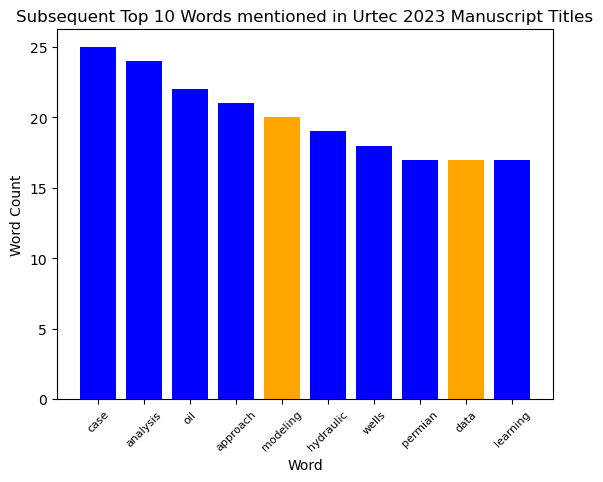

In [26]:
# create a bar chart of the top elements
import matplotlib.pyplot as plt

# Get the top 10 elements and their counts
top_elements = element_counts.most_common(20)

# Create lists of elements and counts
elements = [element for element, count in top_elements]
counts = [count for element, count in top_elements]

# slice the elements and counts to get exclude the top 10 elements
elements = elements[10:]
counts = counts[10:]

# Create a bar chart and highlight specific bars
plt.bar(elements, counts, color=['blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 'orange', 'blue'])


# Add labels to the bar chart
plt.xlabel('Word')
plt.ylabel('Word Count')
plt.xticks(rotation=45, fontsize=8)

plt.title('Subsequent Top 10 Words mentioned in Urtec 2023 Manuscript Titles')


plt.show()
